✈
1) What is Text Similarity?

2) Vector Space

3) Ngram

4) Cosine vs Longest Common Subsequence

5) Vector representation

6) Problem in high dimension

7) Fun with Vector Space
How to model problem as (Bad Practise) :
-Decision Tree
-Linear Regression
-Deep Learning 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
#set a random seed to get same results
import random
random.seed( 42 )

In [ ]:
#How can we words to vectors
names = ["michael","luka","mathias","mathew"]
letters = [chr(i+ord("a")) for i in range(26) ]
vectors = []
for name in names:
  v = [0] * 26
  for index,letter in enumerate(letters) :
    if letter in name :
      v[index] = name.count( letter)
  vectors.append(v)     
df = pd.DataFrame(data=vectors,columns=letters,index = names)
pd.set_option('max_columns', 30)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
michael,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
luka,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
mathias,2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
mathew,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
#Simple vector multiplication gives us how similar they are in their N Vector Space.

#mathias x mathew  => m a t h
print( np.array(vectors[2]) * np.array(vectors[3]) )
print( sum( np.array(vectors[2]) * np.array(vectors[3]) ) )

#mathias x michael => m i a h
print( np.array(vectors[2]) * np.array(vectors[0]) )
print( sum( np.array(vectors[2]) * np.array(vectors[0]) ) )

#mathew x michael => m i a h
print( np.array(vectors[3]) * np.array(vectors[0]) )
print( sum( np.array(vectors[3]) * np.array(vectors[0]) ) )

[2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
5
[2 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
5
[1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
4


In [ ]:
#Utility methods for 

def to_2D_n2(words,ngram):
  cv = CountVectorizer(ngram_range=ngram,analyzer='char')
  count_vector=cv.fit_transform(words)  
  #clf = TruncatedSVD(2)
  #cvector_2d = clf.fit_transform(count_vector)
  print( cv.get_feature_names() )
  print( sorted(cv.vocabulary_.keys() ) )
  return cv,count_vector

def color_df(df):
  return df.style.applymap(lambda x: "background-color: blue" if x>0.8 else "background-color: white")
  


def draw_points(points,labels):
  for p,label in zip(points,labels):
    p = p.flatten()
    plt.plot([0,p[0]],[0,p[1]],label=label )
    plt.text(p[0],p[1],label)
  plt.legend()    

def draw_on3d(X,words):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(projection='3d')
  ax.set_xlabel('1st')
  ax.set_ylabel('2nd')
  ax.set_zlabel('3rd')
  for p,word in zip(X,df_words.index):      
    ax.plot3D( [0,p[0]],[0,p[1]], [0,p[2]] )
    ax.text(p[0], p[1], p[2], word, size=10,color="r")
  ax.view_init(60, 60)    

In [ ]:
[chr(i+ord("a") - 6) if i > 5 else "" for i in range(0,32) ]

['',
 '',
 '',
 '',
 '',
 '',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

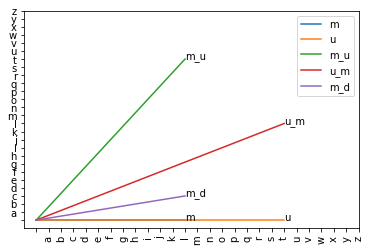

In [ ]:
#custom ord function to make graph more readible
def my_ord(ch):
  return ord(ch) - ord("a") 

#how does vectors seems in 1d and 2d
vector_m = [my_ord("m"),0]
vector_u = [my_ord("u"),0]

vector_m_u = [my_ord("m"), my_ord("u")]
vector_u_m = [my_ord("u"), my_ord("m")]

vector_m_d = [my_ord("m"), my_ord("d")]

draw_points( np.array([vector_m,vector_u,vector_m_u,vector_u_m,vector_m_d]) ,["m","u","m_u","u_m","m_d"] )
labels = [chr(i+ord("a") - 1) if i > 0 else "" for i in range(0,27) ]
_ = plt.xticks(range(0,len(labels)), labels, rotation='vertical')
_ = plt.yticks(range(0,len(labels)), labels, rotation='horizontal')


['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
#Dense vs Sparse vector
words = ["mame","maxxme","mema","m"]
cv,vectors = to_2D_n2(words,(1,1))  
for v in vectors:
  print( "vector",v )
  print( "dense ",v.todense() )

['a', 'e', 'm', 'x']
['a', 'e', 'm', 'x']
vector   (0, 2)	2
  (0, 0)	1
  (0, 1)	1
dense  [[1 1 2 0]]
vector   (0, 2)	2
  (0, 0)	1
  (0, 1)	1
  (0, 3)	2
dense  [[1 1 2 2]]
vector   (0, 2)	2
  (0, 0)	1
  (0, 1)	1
dense  [[1 1 2 0]]
vector   (0, 2)	1
dense  [[0 0 1 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#you can inversely transform numbers to chars
print( cv.inverse_transform([ [1, 1, 2, 0] ]) )
print( cv.inverse_transform([ [ 1, 1, 2, 2] ]) )
print( cv.inverse_transform([ [ 1, 1, 2, 0] ]) )

print( cv.inverse_transform([ [ 0, 0, 0, 0] ]) )

[array(['a', 'e', 'm'], dtype='<U1')]
[array(['a', 'e', 'm', 'x'], dtype='<U1')]
[array(['a', 'e', 'm'], dtype='<U1')]
[array([], dtype='<U1')]


In [ ]:
#how can we visualize what we have done
data = np.array( [ np.array(v.todense().tolist()).reshape( 1,-1)  for v in vectors])
data = data.reshape(data.shape[0],data.shape[2])
print( data.shape )
df_words = pd.DataFrame(data= data.tolist(),index=words,columns=cv.get_feature_names())
df_words

(4, 4)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,e,m,x
mame,1,1,2,0
maxxme,1,1,2,2
mema,1,1,2,0
m,0,0,1,0


Explained variance ration = [0.67975796 0.32024204]


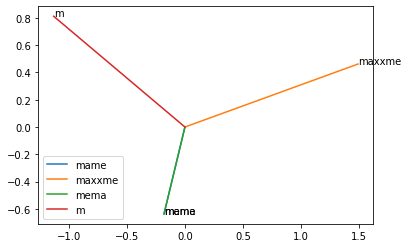

In [ ]:
#how does these vectors map to 2d
pca = PCA(n_components=2)
X = pca.fit_transform(df_words.to_numpy())
print( "Explained variance ration =", pca.explained_variance_ratio_)
draw_points(X,df_words.index)

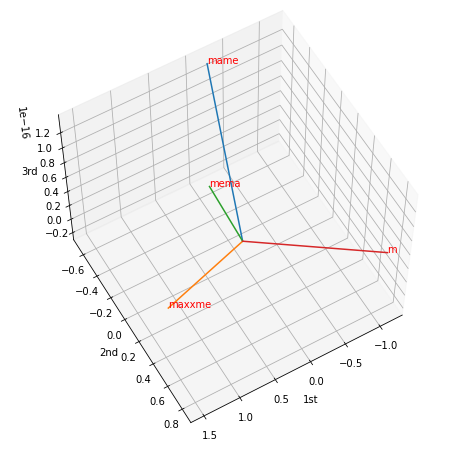

In [ ]:
#how does these vectors map to 3d
X = PCA(n_components=3).fit_transform(df_words.to_numpy())
draw_on3d(X,df_words.index)

In [ ]:
#show similarity as matrix of words for 1gram
#Attention mame = mema , order of chars different but since same set they get perfect point
cos_df = cosine_similarity(df_words)
dfcor = pd.DataFrame(data=cos_df,columns=words,index=words)
dfcor = color_df( dfcor )
dfcor

,mame,maxxme,mema,m
mame,1.000000,0.774597,1.000000,0.816497
maxxme,0.774597,1.000000,0.774597,0.632456
mema,1.000000,0.774597,1.000000,0.816497
m,0.816497,0.632456,0.816497,1.000000


In [ ]:
#Do same experiments with N-gram 2
words = ["mame","maxxme","mema","maxme"]
cv,vectors = to_2D_n2(words,(2,2)) 
data = np.array( [ np.array(v.todense().tolist()).reshape( 1,-1)  for v in vectors])
data = data.reshape(data.shape[0],data.shape[2])
print(data.shape)
print( cv.get_feature_names() )
df_words = pd.DataFrame(data= data,index=words,columns=cv.get_feature_names())
df_words

['am', 'ax', 'em', 'ma', 'me', 'xm', 'xx']
['am', 'ax', 'em', 'ma', 'me', 'xm', 'xx']
(4, 7)
['am', 'ax', 'em', 'ma', 'me', 'xm', 'xx']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,am,ax,em,ma,me,xm,xx
mame,1,0,0,1,1,0,0
maxxme,0,1,0,1,1,1,1
mema,0,0,1,1,1,0,0
maxme,0,1,0,1,1,1,0


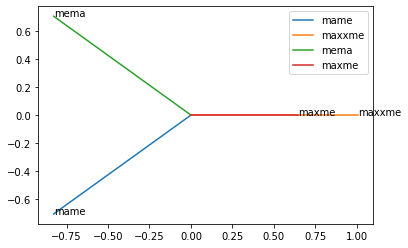

In [ ]:
X = PCA(n_components=2).fit_transform(df_words.to_numpy())
draw_points(X,df_words.index)

array([[0.        , 2.        , 1.41421356, 1.73205081],
       [2.        , 0.        , 2.        , 1.        ],
       [1.41421356, 2.        , 0.        , 1.73205081],
       [1.73205081, 1.        , 1.73205081, 0.        ]])

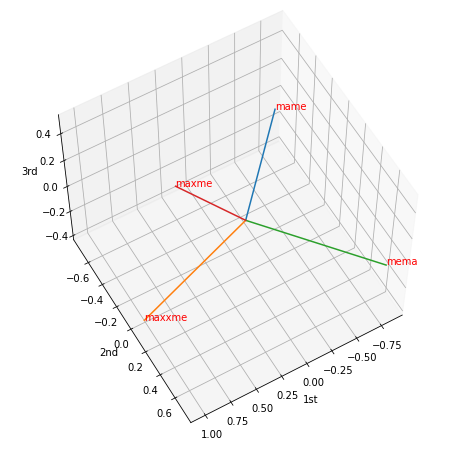

In [ ]:
X = PCA(n_components=3).fit_transform(df_words.to_numpy())
draw_on3d(X,df_words.index)
#Since 3d could be hard to understand check also the real distance
distance.cdist(X, X, 'euclidean')

In [ ]:
#Now mame != mema 
#2grams are different am != em
cos_df = cosine_similarity(df_words)
dfcor = pd.DataFrame(data=cos_df,columns=words,index=words)
dfcor = color_df( dfcor )
dfcor

,mame,maxxme,mema,maxme
mame,1.000000,0.516398,0.666667,0.577350
maxxme,0.516398,1.000000,0.516398,0.894427
mema,0.666667,0.516398,1.000000,0.577350
maxme,0.577350,0.894427,0.577350,1.000000


In [ ]:
#Do same experiments with 3gram
words = ["mame","maxxme","mema","maxme"]
cv,vectors = to_2D_n2(words,(3,3)) 
data = np.array( [ np.array(v.todense().tolist()).reshape( 1,-1)  for v in vectors])
data = data.reshape(data.shape[0],data.shape[2])
print(data.shape)
print( cv.get_feature_names() )
df_words = pd.DataFrame(data= data,index=words,columns=cv.get_feature_names())
df_words

['ame', 'axm', 'axx', 'ema', 'mam', 'max', 'mem', 'xme', 'xxm']
['ame', 'axm', 'axx', 'ema', 'mam', 'max', 'mem', 'xme', 'xxm']
(4, 9)
['ame', 'axm', 'axx', 'ema', 'mam', 'max', 'mem', 'xme', 'xxm']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ame,axm,axx,ema,mam,max,mem,xme,xxm
mame,1,0,0,0,1,0,0,0,0
maxxme,0,0,1,0,0,1,0,1,1
mema,0,0,0,1,0,0,1,0,0
maxme,0,1,0,0,0,1,0,1,0


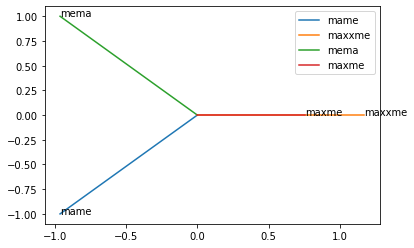

In [ ]:
X =  PCA(n_components=2).fit_transform(df_words.to_numpy())
draw_points(X,df_words.index)

array([[0.        , 2.44948974, 2.        , 2.23606798],
       [2.44948974, 0.        , 2.44948974, 1.73205081],
       [2.        , 2.44948974, 0.        , 2.23606798],
       [2.23606798, 1.73205081, 2.23606798, 0.        ]])

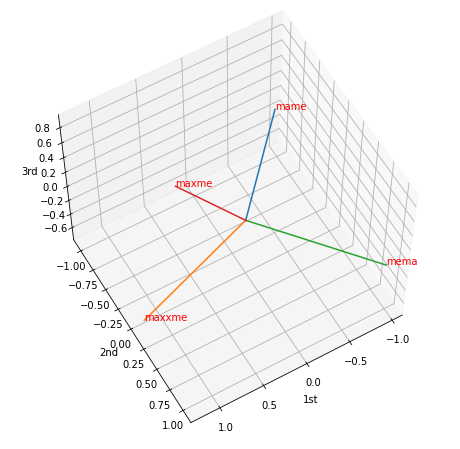

In [ ]:
X = PCA(n_components=3).fit_transform(df_words.to_numpy())
draw_on3d(X,df_words.index)
distance.cdist(X, X, 'euclidean')

In [ ]:
#now mame and mema are totally unrelated !!!

cos_df = cosine_similarity(df_words)
dfcor = pd.DataFrame(data=cos_df,columns=words,index=words)
dfcor = color_df( dfcor )
dfcor

,mame,maxxme,mema,maxme
mame,1.000000,0.000000,0.000000,0.000000
maxxme,0.000000,1.000000,0.000000,0.577350
mema,0.000000,0.000000,1.000000,0.000000
maxme,0.000000,0.577350,0.000000,1.000000


In [ ]:
#Try 2gram and 3grams at same time
words = ["mame","maxxme","mema","maxme"]
cv,vectors = to_2D_n2(words,(2,3)) 
data = np.array( [ np.array(v.todense().tolist()).reshape( 1,-1)  for v in vectors])
data = data.reshape(data.shape[0],data.shape[2])
print(data.shape)
print( cv.get_feature_names() )
df_words = pd.DataFrame(data= data,index=words,columns=cv.get_feature_names())
df_words

['am', 'ame', 'ax', 'axm', 'axx', 'em', 'ema', 'ma', 'mam', 'max', 'me', 'mem', 'xm', 'xme', 'xx', 'xxm']
['am', 'ame', 'ax', 'axm', 'axx', 'em', 'ema', 'ma', 'mam', 'max', 'me', 'mem', 'xm', 'xme', 'xx', 'xxm']
(4, 16)
['am', 'ame', 'ax', 'axm', 'axx', 'em', 'ema', 'ma', 'mam', 'max', 'me', 'mem', 'xm', 'xme', 'xx', 'xxm']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,am,ame,ax,axm,axx,em,ema,ma,mam,max,me,mem,xm,xme,xx,xxm
mame,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0
maxxme,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1
mema,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0
maxme,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,0


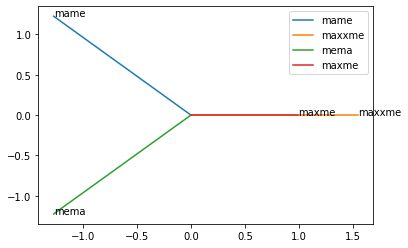

In [ ]:
X = PCA(n_components=2).fit_transform(df_words.to_numpy())
draw_points(X,df_words.index)

variance [0.57465176 0.26086957 0.16447867]


array([[0.        , 3.16227766, 2.44948974, 2.82842712],
       [3.16227766, 0.        , 3.16227766, 2.        ],
       [2.44948974, 3.16227766, 0.        , 2.82842712],
       [2.82842712, 2.        , 2.82842712, 0.        ]])

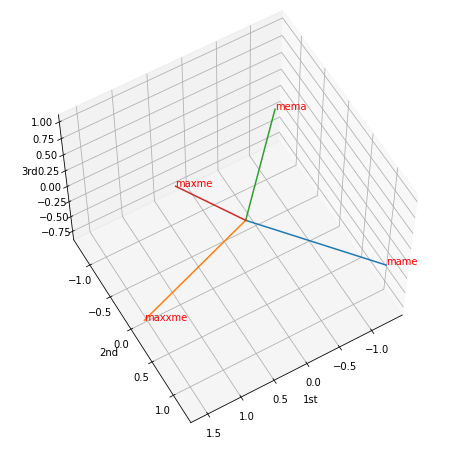

In [ ]:
pca = PCA(n_components=3)

X = pca.fit_transform(df_words.to_numpy())
print("variance", pca.explained_variance_ratio_)
draw_on3d(X,df_words.index)
distance.cdist(X, X, 'euclidean')


In [ ]:
#now similarities seem more calibirated
#maxme, maxxme tuple must be much more similar
cos_df = cosine_similarity(df_words)
dfcor = pd.DataFrame(data=cos_df,columns=words,index=words)
dfcor = color_df( dfcor )
dfcor

,mame,maxxme,mema,maxme
mame,1.000000,0.298142,0.400000,0.338062
maxxme,0.298142,1.000000,0.298142,0.755929
mema,0.400000,0.298142,1.000000,0.338062
maxme,0.338062,0.755929,0.338062,1.000000


In [ ]:
distance.cdist(df_words.to_numpy(), df_words.to_numpy(), 'euclidean')


array([[0.        , 3.16227766, 2.44948974, 2.82842712],
       [3.16227766, 0.        , 3.16227766, 2.        ],
       [2.44948974, 3.16227766, 0.        , 2.82842712],
       [2.82842712, 2.        , 2.82842712, 0.        ]])

In [ ]:
#Now lets generate a hypothetical data
names = ["michael","luka","mathias","mathew"]
surnames = ["ballack","zerven","zammer","ballon"]
addresses = ["8004","8008","9004","9006"] 

def corrupt(s):
  rand_index = random.randint(0,len(s)-1)
  rand_char = chr( ord("a") + random.randint(0,25) )
  s = s[0:rand_index]+rand_char+s[ 1 + rand_index :]
  return s

class Record:
  def __init__(self,id,name,surname,addr):
    self.name = name
    self.id = id
    self.surname = surname
    self.addr = addr  
  def corrupt(self):              
    self.name = corrupt( self.name )    
    self.surname = corrupt( self.surname )    
    self.addr = corrupt( self.addr )

  def row(self):
    return [self.id, self.name, self.surname, self.addr]
  def summary(self):
    return f" {self.name} {self.surname} {self.addr}"  

def rand_record():
    
    name_index = random.randint(0, len(names) -1)
    surnames_index = random.randint(0, len(surnames) -1)
    addresses_index = random.randint(0, len(addresses) -1)
    id = str(name_index)+"_"+str(surnames_index)+"_"+str(addresses_index)
    
    while True:
      
      yield Record(id, names[name_index],surnames[surnames_index],addresses[addresses_index] )
      name_index = random.randint(0, len(names) -1)
      surnames_index = random.randint(0, len(surnames) -1)
      addresses_index = random.randint(0, len(addresses) -1 )
      id = str(name_index)+"_"+str(surnames_index)+"_"+str(addresses_index)

items = []
for i in range(1400):
  items.append( next(rand_record( ) ))    
import copy
#[item.summary() for item in items]     
for i in range( len(items) ):
  corrupted = copy.deepcopy(items[i])  
  corrupted.corrupt()
  items.append( corrupted )

In [ ]:
#0´-14000 original items
#index + 1400 is corrupted version of item at inde
print( items[0].summary() )
print( items[1400].summary() )
datas = [ r.row() for r in items  ]

 michael ballack 9004
 michaeu oallack 90i4


In [ ]:
df = pd.DataFrame(data = datas , columns=["id","name","surname","address"])
df.head( 15)

,id,name,surname,address
0,0_0_2,michael,ballack,9004
1,1_1_1,luka,zerven,8008
2,0_0_3,michael,ballack,9006
3,0_0_0,michael,ballack,8004
4,1_1_0,luka,zerven,8004
5,1_3_1,luka,ballon,8008
6,3_2_0,mathew,zammer,8004
7,1_3_2,luka,ballon,9004
8,2_1_1,mathias,zerven,8008
9,2_0_0,mathias,ballack,8004


In [ ]:

cv = CountVectorizer(lowercase=True,stop_words="english",ngram_range=(1,1))

In [ ]:
#combine data as it is, and by inserting noise
#why did we insert noise?
def row_tostr_noise(r):
  return r["name"] +"XX" +r["surname"] + "YY"+r["address"]

def row_tostr(r):
  return r["name"]  +r["surname"] + r["address"]  

df["combined"] = df.apply(row_tostr,axis=1)
df["combined_noise"] = df.apply(row_tostr_noise,axis=1)
df.head( 5 )

,id,name,surname,address,combined,combined_noise
0,0_0_2,michael,ballack,9004,michaelballack9004,michaelXXballackYY9004
1,1_1_1,luka,zerven,8008,lukazerven8008,lukaXXzervenYY8008
2,0_0_3,michael,ballack,9006,michaelballack9006,michaelXXballackYY9006
3,0_0_0,michael,ballack,8004,michaelballack8004,michaelXXballackYY8004
4,1_1_0,luka,zerven,8004,lukazerven8004,lukaXXzervenYY8004


In [ ]:
#How does vectors look like in this dimension
from sklearn.decomposition import TruncatedSVD
def to_2D_n2(df,source_col,target_col,ngram,dump_sample):
  cv = CountVectorizer(ngram_range=ngram,analyzer='char_wb')
  count_vector=cv.fit_transform(df[source_col])
  if dump_sample:
    print(f"Sample vector",type(count_vector[0]) )
    #print(f"Sample vector",count_vector[0].todense() )
    print(f"Sample vector",count_vector[0] )    
    print(f"Sample vector",count_vector[1])
    print(f"Sample vector",count_vector[1400])
  clf = TruncatedSVD(2)
  cvector_2d = clf.fit_transform(count_vector)
  print("Vectos shape:",cvector_2d.shape)
  df[target_col] = cvector_2d.tolist()
  df[target_col] = df[target_col].apply( lambda x: np.array(x).reshape(1, -1) )

In [ ]:
"""
Sample vector [[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
"""
""

''

In [ ]:
#lets generate numeric vectors from this data
to_2D_n2( df, "combined","combined_n2",(2,2), dump_sample=True)
to_2D_n2( df, "combined_noise","combined_n2_noise",(2,2), dump_sample=False)
to_2D_n2( df, "combined","combined_n1",(1,1), dump_sample=False)
to_2D_n2( df, "combined_noise","combined_n1_noise",(1,1), dump_sample=False)
df.head(5)

Sample vector <class 'scipy.sparse.csr.csr_matrix'>
Sample vector   (0, 12)	1
  (0, 478)	1
  (0, 353)	1
  (0, 190)	1
  (0, 319)	1
  (0, 123)	1
  (0, 251)	1
  (0, 439)	1
  (0, 151)	1
  (0, 130)	1
  (0, 449)	1
  (0, 438)	1
  (0, 121)	1
  (0, 193)	1
  (0, 405)	1
  (0, 86)	1
  (0, 26)	1
  (0, 27)	1
  (0, 56)	1
Sample vector   (0, 26)	1
  (0, 11)	1
  (0, 458)	1
  (0, 716)	1
  (0, 406)	1
  (0, 144)	1
  (0, 849)	1
  (0, 257)	1
  (0, 635)	1
  (0, 742)	1
  (0, 253)	1
  (0, 500)	1
  (0, 59)	1
  (0, 29)	1
  (0, 58)	1
Sample vector   (0, 12)	1
  (0, 478)	1
  (0, 353)	1
  (0, 190)	1
  (0, 319)	1
  (0, 123)	1
  (0, 130)	1
  (0, 449)	1
  (0, 438)	1
  (0, 121)	1
  (0, 193)	1
  (0, 405)	1
  (0, 86)	1
  (0, 56)	1
  (0, 260)	1
  (0, 720)	1
  (0, 534)	1
  (0, 38)	1
  (0, 347)	1
Vectos shape: (2800, 2)
Vectos shape: (2800, 2)
Vectos shape: (2800, 2)
Vectos shape: (2800, 2)


,id,name,surname,address,combined,combined_noise,combined_n2,combined_n2_noise,combined_n1,combined_n1_noise
0,0_0_2,michael,ballack,9004,michaelballack9004,michaelXXballackYY9004,"[[2.821315596677909, -0.714883217555223]]","[[3.331529061283752, 1.3753153560911275]]","[[5.498298309443613, 1.8555808424412052]]","[[6.146754019530898, 1.909382773865731]]"
1,1_1_1,luka,zerven,8008,lukazerven8008,lukaXXzervenYY8008,"[[1.6209282573502717, 1.2451094263933005]]","[[2.481077999031331, -1.3829092654030979]]","[[3.7977565538988953, -0.8746323531888791]]","[[4.737188554357176, -0.8871077109083061]]"
2,0_0_3,michael,ballack,9006,michaelballack9006,michaelXXballackYY9006,"[[2.602991322421633, -0.7580514531955119]]","[[3.1654390677154516, 1.3983061050043528]]","[[5.447026491293633, 1.865090381806526]]","[[6.103459706219918, 1.9173375887975466]]"
3,0_0_0,michael,ballack,8004,michaelballack8004,michaelXXballackYY8004,"[[2.8286582974161933, -0.768520236912164]]","[[3.3224680573007697, 1.429467183651152]]","[[5.542639592625021, 1.8584424713080248]]","[[6.183323224364551, 1.914659111840555]]"
4,1_1_0,luka,zerven,8004,lukazerven8004,lukaXXzervenYY8004,"[[1.848195987925187, 1.3365001379644745]]","[[2.6560626393579523, -1.4475939137780942]]","[[3.7558360292033184, -0.8778721337194882]]","[[4.702460091817735, -0.8924461174231758]]"


In [ ]:
#want to see orginal and corrupted corresponding item
df.iloc[ [0,1,1400,1401] ]

,id,name,surname,address,combined,combined_noise,combined_n2,combined_n2_noise,combined_n1,combined_n1_noise
0,0_0_2,michael,ballack,9004,michaelballack9004,michaelXXballackYY9004,"[[2.821315596677909, -0.714883217555223]]","[[3.331529061283752, 1.3753153560911275]]","[[5.498298309443613, 1.8555808424412052]]","[[6.146754019530898, 1.909382773865731]]"
1,1_1_1,luka,zerven,8008,lukazerven8008,lukaXXzervenYY8008,"[[1.6209282573502717, 1.2451094263933005]]","[[2.481077999031331, -1.3829092654030979]]","[[3.7977565538988953, -0.8746323531888791]]","[[4.737188554357176, -0.8871077109083061]]"
1400,0_0_2,michaeu,oallack,90i4,michaeuoallack90i4,michaeuXXoallackYY90i4,"[[1.9454287768089236, -0.5430953735656618]]","[[2.4370083824746773, 0.8752675101194509]]","[[4.9090287032281585, 1.2527499080535618]]","[[5.6527074607981165, 1.288791560880983]]"
1401,1_1_1,lula,zervrn,80l8,lulazervrn80l8,lulaXXzervrnYY80l8,"[[0.9796735969587735, 0.6597250506157528]]","[[1.9514172421239853, -0.892490745741623]]","[[3.775028421374217, 0.2892736465365978]]","[[4.71378062823201, 0.27450092284393324]]"


x & x' [[0.99714216]]
y & y' [[0.95449506]]
x & y [[0.85156347]]


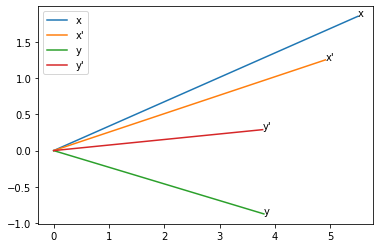

In [ ]:
#Lets see how similar are original and corrupted and project them into 2d , with combined , Ngram1
x,x1,y,y1 = df.iloc[0]["combined_n1"],df.iloc[1400]["combined_n1"],df.iloc[1]["combined_n1"],df.iloc[1401]["combined_n1"]
print("x & x'",cosine_similarity(x,x1) )
print("y & y'",cosine_similarity(y,y1) )
print("x & y",cosine_similarity(x,y) )

draw_points([ x,x1,y,y1],["x","x'","y","y'"])

x & x' [[0.9970355]]
y & y' [[0.97055103]]
x & y [[0.88406658]]


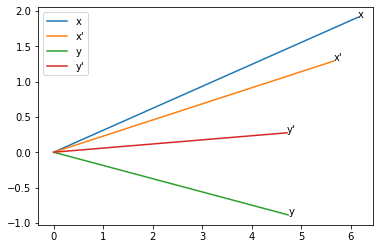

In [ ]:
#Lets see how similar are original and corrupted and project them into 2d , with combinednoise
#with noise result is better , why??? noise enables for determinin word boundaries
x,x1,y,y1 = df.iloc[0]["combined_n1_noise"],df.iloc[1400]["combined_n1_noise"],df.iloc[1]["combined_n1_noise"],df.iloc[1401]["combined_n1_noise"]

print("x & x'",cosine_similarity(x,x1) )
print("y & y'",cosine_similarity(y,y1) )
print("x & y",cosine_similarity(x,y) )

draw_points([ x,x1,y,y1],["x","x'","y","y'"])

x & x' [[0.99971031]]
y & y' [[0.99805656]]
x & y [[0.61911813]]


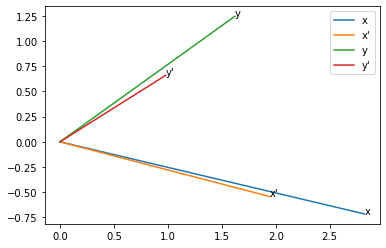

In [ ]:
#Lets see how similar are original and corrupted and project them into 2d , with combined , Ngram2

x,x1,y,y1 = df.iloc[0]["combined_n2"],df.iloc[1400]["combined_n2"],df.iloc[1]["combined_n2"],df.iloc[1401]["combined_n2"]
print("x & x'",cosine_similarity(x,x1) )
print("y & y'",cosine_similarity(y,y1) )
print("x & y",cosine_similarity(x,y) )

draw_points([ x,x1,y,y1],["x","x'","y","y'"])

x & x' [[0.99890982]]
y & y' [[0.99683838]]
x & y [[0.62160936]]


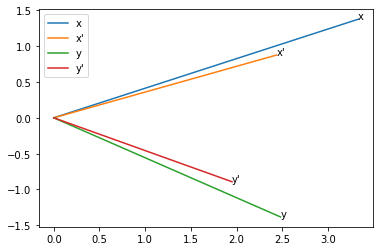

In [ ]:
#Lets see how similar are original and corrupted and project them into 2d , with combinednoise , Ngram1

x,x1,y,y1 = df.iloc[0]["combined_n2_noise"],df.iloc[1400]["combined_n2_noise"],df.iloc[1]["combined_n2_noise"],df.iloc[1401]["combined_n2_noise"]
print("x & x'",cosine_similarity(x,x1) )
print("y & y'",cosine_similarity(y,y1) )
print("x & y",cosine_similarity(x,y) )

draw_points([ x,x1,y,y1],["x","x'","y","y'"])

In [ ]:
#Now lets generate input pairs and 
#x1,x2 as features 
#y as target vector
def gen_pairs(df):
  rnd_index = random.randint(0,1400) 
  id1 = df.iloc[rnd_index]["id"]
  combined_noise1 = df.iloc[rnd_index]["combined_noise"]
  combined_n2_noise = df.iloc[rnd_index]["combined_n2_noise"]

  rnd_index2 = random.randint(0,1400)
  id2 = df.iloc[rnd_index2]["id"]
  combined_noise2 = df.iloc[rnd_index2]["combined_noise"]
  combined_n2_noise2 = df.iloc[rnd_index2]["combined_n2_noise"]
  cos = cosine_similarity(combined_n2_noise,combined_n2_noise2)

  combined_vector = np.hstack( (combined_n2_noise,combined_n2_noise2)).flatten()

  return [id1,combined_noise1,combined_n2_noise,id2,combined_noise2,combined_n2_noise2,combined_vector,cos.flatten()[0]]


In [ ]:
data = [ gen_pairs(df) for _ in range(1000) ]
df2 = pd.DataFrame( data=data, columns=["id1","combined_noise1","combined_n2_noise","id2","combined_noise2","combined_n2_noise2","combined_vector","cosine"])

In [ ]:
#make an adhoc classification
classmap = {0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3}

#df2["class"] = df2["cosine"].apply(lambda x : classmap.get( int(x * 10)  ) ) 
def fclass(x):
  val_x = 10 * x
  if val_x < 3:
    return 1
  elif val_x < 7:
    return 1
  else:
    return 2    
df2["class"] = df2["cosine"].apply(fclass ) 

In [ ]:
df2.head(10)

,id1,combined_noise1,combined_n2_noise,id2,combined_noise2,combined_n2_noise2,combined_vector,cosine,class
0,2_3_3,mathiasXXballonYY9006,"[[3.483750093350927, 1.3909624296897214]]",3_0_1,mathewXXballackYY8008,"[[3.3664050756752606, 1.8906721503875874]]","[3.483750093350927, 1.3909624296897214, 3.3664...",0.991320,2
1,2_2_1,mathiasXXzammerYY8008,"[[3.1501985868200726, -1.4114129469137344]]",2_2_0,mathiasXXzammerYY8004,"[[3.3251832271466943, -1.476097595288731]]","[3.1501985868200726, -1.4114129469137344, 3.32...",0.999994,2
2,2_1_3,mathiasXXzervenYY9006,"[[3.3040169203764123, -1.3847954583736204]]",3_0_3,mathewXXballackYY9006,"[[3.3843607264165647, 1.7948264233657918]]","[3.3040169203764123, -1.3847954583736204, 3.38...",0.633677,1
3,0_0_3,michaelXXballackYY9006,"[[3.1654390677154516, 1.3983061050043528]]",3_0_3,mathewXXballackYY9006,"[[3.3843607264165647, 1.7948264233657918]]","[3.1654390677154516, 1.3983061050043528, 3.384...",0.997434,2
4,2_0_0,mathiasXXballackYY8004,"[[3.6226706345372865, 1.895293045971134]]",0_3_1,michaelXXballonYY8008,"[[3.165591865373106, 1.0209822943915354]]","[3.6226706345372865, 1.895293045971134, 3.1655...",0.985581,2
5,2_0_3,mathiasXXballackYY9006,"[[3.465641644951969, 1.8641319673243346]]",3_1_2,mathewXXzervenYY9004,"[[3.388825995409308, -1.4770917512453885]]","[3.465641644951969, 1.8641319673243346, 3.3888...",0.618047,1
6,2_0_0,mathiasXXballackYY8004,"[[3.6226706345372865, 1.895293045971134]]",3_0_2,mathewXXballackYY9004,"[[3.5504507199848647, 1.7718356744525665]]","[3.6226706345372865, 1.895293045971134, 3.5504...",0.999817,2
7,0_0_3,michaelXXballackYY9006,"[[3.1654390677154516, 1.3983061050043528]]",3_3_0,mathewXXballonYY8004,"[[3.559498164400841, 1.3528179643779779]]","[3.1654390677154516, 1.3983061050043528, 3.559...",0.998608,2
8,3_2_0,mathewXXzammerYY8004,"[[3.24390230861129, -1.5454031392472745]]",2_1_0,mathiasXXzervenYY8004,"[[3.46104590996173, -1.353634379726821]]","[3.24390230861129, -1.5454031392472745, 3.4610...",0.997425,2
9,2_3_2,mathiasXXballonYY9004,"[[3.6498400869192276, 1.3679716807764961]]",2_0_3,mathiasXXballackYY9006,"[[3.465641644951969, 1.8641319673243346]]","[3.6498400869192276, 1.3679716807764961, 3.465...",0.990915,2


In [ ]:
#Just get X and y , feature, target
y_ = df2["cosine"]
X_ = np.array( df2["combined_vector"].to_list() )
y_class_ = np.array( df2["class"].to_list() )

X_2 = PCA(n_components=1).fit_transform(X_)

print(X_.shape)
print(y_.shape)

(1000, 4)
(1000,)


In [ ]:
import sklearn
#splitting of cos , for Regression problems
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_,y_)

#splitting of class , for Classification problems  4 features
X_train_class, X_test_class, y_train_class, y_test_class = sklearn.model_selection.train_test_split(X_,y_class_)

#splitting of class , for Classification problems  2 features
X_train_class_2, X_test_class_2, y_train_class_2, y_test_class_2 = sklearn.model_selection.train_test_split(X_2,y_class_)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [ ]:
X_.shape

(1000, 4)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/p

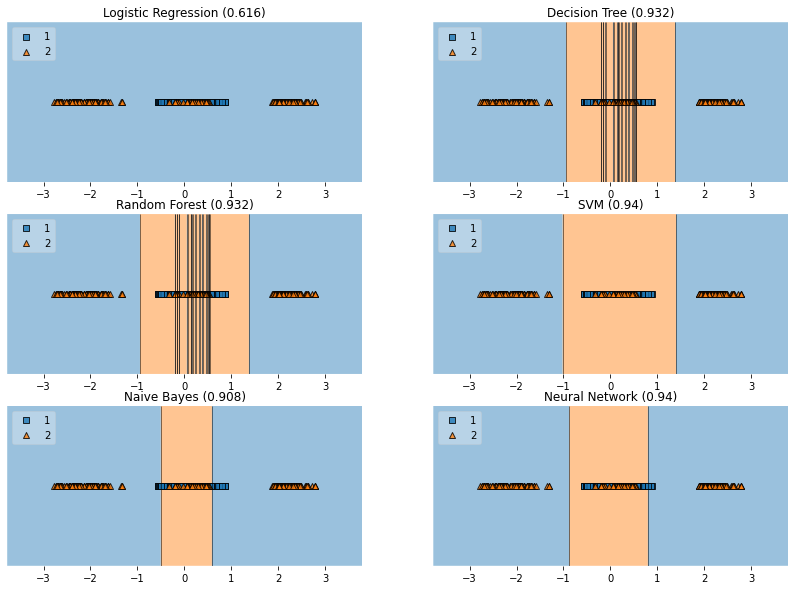

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
 
 
 
# Initializing Classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(gamma='auto')
clf5 = GaussianNB()
clf6 = MLPClassifier()
 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
 
gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(14,10))

 
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
 
    clf.fit(X_train_class_2, y_train_class_2)
    predict = clf.predict( X_test_class_2)
    accuracy = str( sklearn.metrics.accuracy_score(y_test_class_2,predict) )
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_class_2, y=y_train_class_2, clf=clf, legend=2)
    
    plt.title(f"{lab} ({accuracy})")
 
plt.show()

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 731 kB/s 


0.024752033752659792
['Feature1' 'Feature2' 'Feature3' 'Feature4']
(4,)


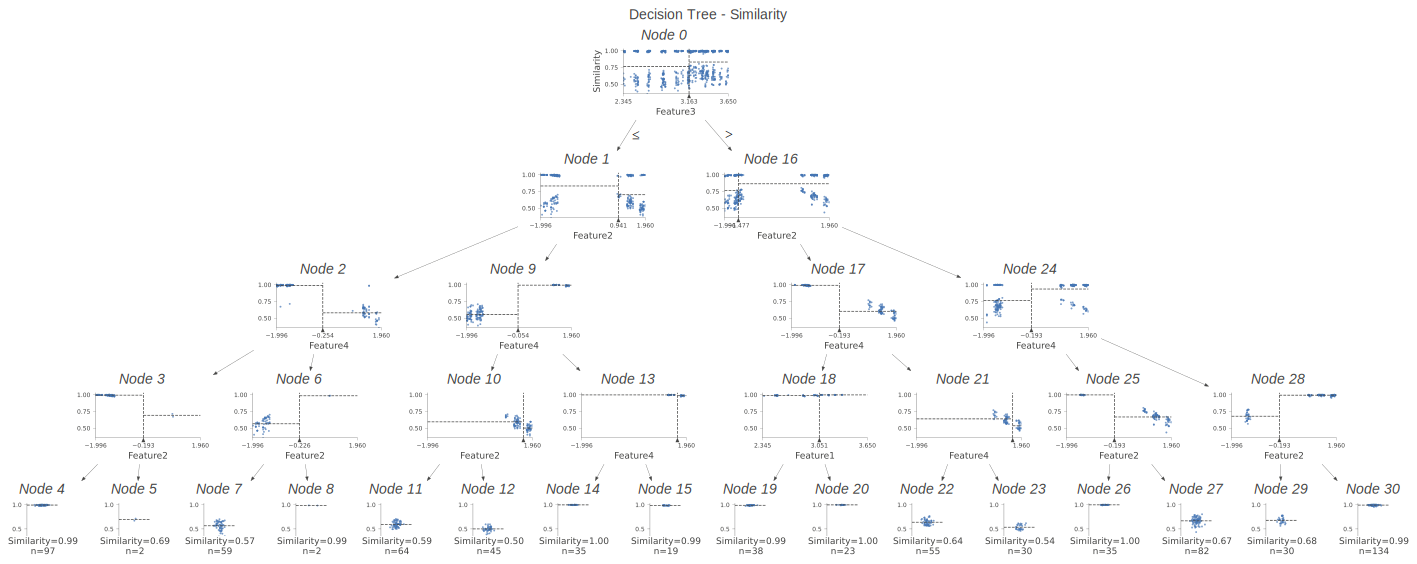

In [ ]:
#Method from sklearn sample, dump as Decisiontree plot
from sklearn import tree
from dtreeviz.trees import *

reg = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

y_1 = reg.predict(X_test)
print(np.mean(np.abs(y_test - y_1)) )
fnames = np.array( ["Feature1","Feature2","Feature3","Feature4"] )

print( fnames )
print( fnames.shape )

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='Similarity',
               feature_names= fnames,
               title="Decision Tree - Similarity",
               show_node_labels = True)
viz

(750, 4)


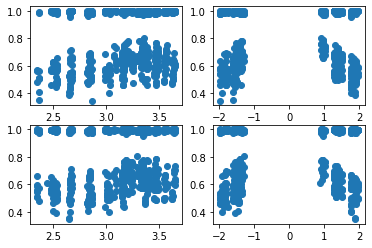

In [ ]:
#Dump indivual columns
print(X_train.shape)
fig, axs = plt.subplots(2, 2)

axs[0,0].scatter(X_train[:,0],y_train)
axs[0,1].scatter(X_train[:,1],y_train)
axs[1,0].scatter(X_train[:,2],y_train)
axs[1,1].scatter(X_train[:,3],y_train)

(1000, 1)
(1000, 1) y (1000,)


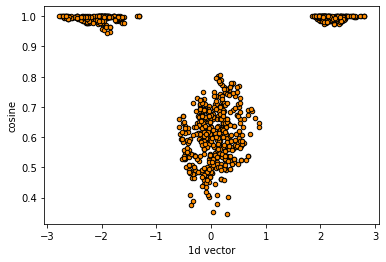

In [ ]:
#Dump this whole set in 2d
X = PCA(n_components=1).fit_transform(X_)
y = y_
print(X.shape)
print(X.shape,"y",y.shape)
plt.xlabel("1d vector")
plt.ylabel("cosine")
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")

(1000, 2)
(1000, 2) y (1000,)


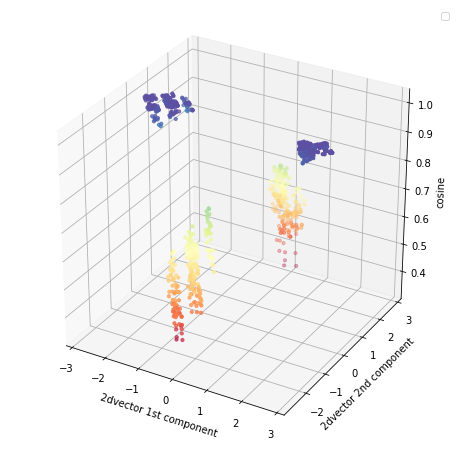

In [ ]:
#dump in 3d
pca = PCA(n_components=2)
X = pca.fit_transform(X_)
y = y_
print(X.shape)
print(X.shape,"y",y.shape)

c = (y<=0.9)



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
#ax.scatter(X[:,0],X[:,1], y, c = c,cmap = 'coolwarm' ,s=30)
ax.set_xlabel('2dvector 1st component')
ax.set_ylabel('2dvector 2nd component')
ax.set_zlabel('cosine')
ax.legend(loc=1)
ax.scatter(X[:,0],X[:,1], y, c=y, marker='o', s=10, cmap="Spectral" )

In [ ]:
print( X.shape )
print( y.shape)
import sklearn

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

(1000, 2)
(1000,)


In [ ]:
#Solve this with a Neural Network
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add( Dense(64,input_shape=(2,) ,activation='relu' ) )
model.add( Dense(32 ,activation='relu' ) )
model.add( Dense(1 ,activation='linear') )
model.compile(loss="mae",optimizer="adam" ,metrics=["mean_absolute_percentage_error"])
model.fit( X_train,y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 6ms/step - loss: 0.5800 - mean_absolute_percentage_error: 70.6633
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1377 - mean_absolute_percentage_error: 20.3773
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0935 - mean_absolute_percentage_error: 12.8752
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0906 - mean_absolute_percentage_error: 12.8920
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0860 - mean_absolute_percentage_error: 12.1575
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0819 - mean_absolute_percentage_error: 11.5607
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 0.0792 - mean_absolute_percentage_error: 11.2395
Epoch 8/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0753 - mean_absolute_percentage_error: 10.6561
Epoch 9/10
24/24 [==============

In [ ]:
model.evaluate(X_test,y_test, verbose=1)

8/8 [==============================] - 0s 5ms/step - loss: 0.0658 - mean_absolute_percentage_error: 9.4344


[0.06578178703784943, 9.434357643127441]

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [ ]:
X = X_
y = y_
print(X.shape)
print(y.shape)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

(1000, 4)
(1000,)


array([0.9925442 , 0.99338996, 0.99444125, 0.98887615, 0.99007685,
       0.99483043, 0.98892129, 0.98821513, 0.99237776, 0.99304378])

In [ ]:
pca = PCA(n_components=1)
X = pca.fit_transform(X_)
y = y_

print(X.shape)

(1000, 1)


In [ ]:
#Try Regressor with only 1 vector
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=4
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

print( y.shape)
print( y_2.shape)

(1000,)
(1000,)


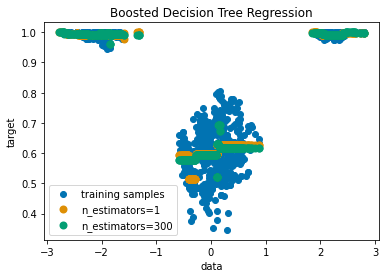

In [ ]:
#Dump regressor findings
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.scatter(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.scatter(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
print(np.mean(np.abs(y - y_1)) )
print(np.mean(np.abs(y - y_2)) )

0.03505480316018002
0.03576461668436208


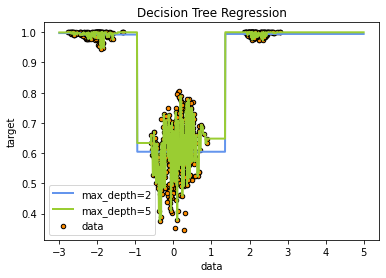

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
pca = PCA(n_components=1)
X = pca.fit_transform(X_)
y = y_

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=25)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.linspace(-3, 5.0, X.shape[0]).reshape(-1,1) #np.arange(-3, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
print(np.mean(np.abs(y - y_1)) )
print(np.mean(np.abs(y - y_2)) )


0.19601980272367917
0.1989460486411537


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

Coefficients: 
 [-0.00213208]
Mean squared error: 0.04
Coefficient of determination: 0.00


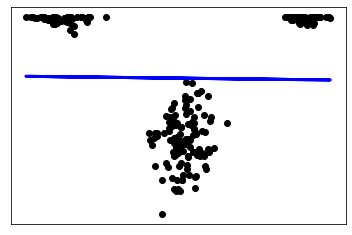

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()